In [1]:
import cantera as ct
import matplotlib.pyplot as plt
import polars

from cantera_practice import reactors

In [2]:
model = ct.Solution("data/webb_cyclopentane.yaml")
conc_df = polars.read_csv("data/webb_concentrations.csv")

In [3]:
temp = 825
pres = 1.1 * ct.one_atm  # in atm.
concs = conc_df.select("CPT(563)", "N2", "O2(6)").rows(named=True)

tau = 4  # s
vol = 1 * (1e-2) ** 3  # m3

In [4]:
# Create a SolutionArray to store values for the above points
solns = ct.SolutionArray(model)

In [ ]:
for conc in concs:
    print(f"Starting simulation for {conc}")
    reactor = reactors.jsr(model=model, temp=temp, pres=pres, tau=tau, vol=vol, conc=conc)
    solns.append(reactor.thermo.state)

Starting simulation for {'CPT(563)': 0.005, 'N2': 0.9825, 'O2(6)': 0.0125}
Starting simulation for {'CPT(563)': 0.005, 'N2': 0.97625, 'O2(6)': 0.01875}
Starting simulation for {'CPT(563)': 0.005, 'N2': 0.973571429, 'O2(6)': 0.021428571}
Starting simulation for {'CPT(563)': 0.005, 'N2': 0.97, 'O2(6)': 0.025}
Starting simulation for {'CPT(563)': 0.005, 'N2': 0.965, 'O2(6)': 0.03}
Starting simulation for {'CPT(563)': 0.005, 'N2': 0.960909091, 'O2(6)': 0.034090909}


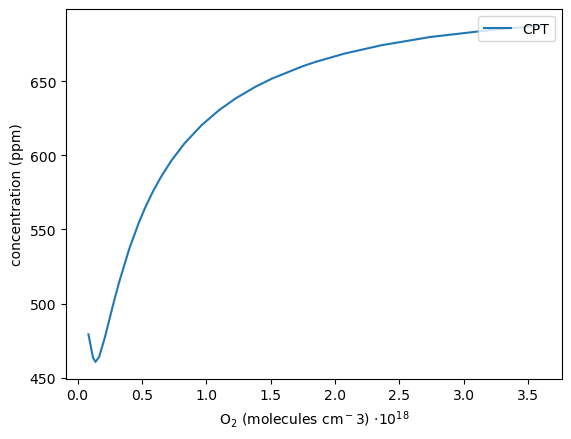

In [13]:
plt.figure()
plt.plot(
    solns("O2(6)").X * 9.782586051, solns("C5H8(522)").X * 10**6, color="C0", label="CPT"
)

plt.xlabel(r"O$_2$ (molecules cm$^{-3}$) $\cdot 10^{18}$")
plt.ylabel("concentration (ppm)")

plt.legend(loc=1)